In [42]:
from mmengine import Config
import torch
from matplotlib import pyplot as plt
import numpy as np
import os
import torchvision
from mae import TorchMae
from flower_dataset import get_flower_test_data

In [43]:
ckp_root = '06-01-24/20:15:22-[backbone-exp]-[vit-base-mr-0.75-bs-16]'
config = Config.fromfile(os.path.join(ckp_root, 'config.py'))
ckp = torch.load(os.path.join(ckp_root, 'last.ckpt'))

In [44]:
model = TorchMae(**config.model_config)
sd = ckp['state_dict'] 
sd = {k[6:]: v for k, v in sd.items()}
model.load_state_dict(sd)

/home/dmt/anaconda3/envs/shao-tao-dl-torch-2-1/lib/python3.9/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


<All keys matched successfully>

In [45]:
val_data, val_loader = get_flower_test_data(config.val_data_config)
batch = next(iter(val_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


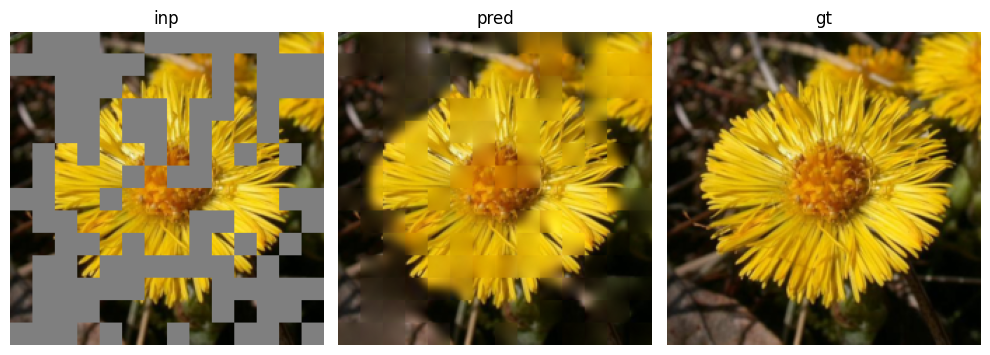

In [49]:
img = batch['img']
shuffled_idx = batch['shuffled_idx']
img.shape, shuffled_idx.shape
model.eval()
idx = 5
mask_r = 0.50
img_size = config.model_config.img_size
patch_size = config.model_config.patch_size
num_mask_tokens = int(mask_r * img_size**2 / patch_size**2)
with torch.no_grad():
    out = model.predict(img[idx:idx+1], 
                        shuffled_idx[idx, :num_mask_tokens], 
                        shuffled_idx[idx, num_mask_tokens:])
    inp_img = out['inp_img']
    dec_inp = out['dec_img']
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow((inp_img[0].permute(1, 2, 0) + 1.0) / 2.0)
    plt.axis('off')
    plt.title('inp')
    plt.subplot(1, 3, 2)    
    plt.imshow((dec_inp[0].permute(1, 2, 0) + 1.0) / 2.0)
    plt.axis('off')
    plt.title('pred')
    plt.subplot(1, 3, 3)    
    plt.imshow((img[idx: idx+1][0].permute(1, 2, 0) + 1.0) / 2.0)
    plt.axis('off')
    plt.title('gt')
    plt.tight_layout()
    plt.show()